# Programa de Estágio Quod | Teste de Analytics

## Bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criando o script

In [2]:
# Função para gerar dados
def dados_simulados():
  np.random.seed(42)
  datas = pd.date_range(start='2023-01-01', end='2023-12-31')
  produtos = ['Produto A', 'Produto B', 'Produto C']
  categorias = ['Categoria 1', 'Categoria 2', 'Categoria 3']

  # Criando o dataset
  df_vendas = pd.DataFrame({
      'ID' : range(1, 51),
      'Data': np.random.choice(datas, 50),
      'Produto': np.random.choice(produtos, 50),
      'Categoria': np.random.choice(categorias, 50),
      'Quantidade': np.random.randint(1, 20, 50),
      'Preço': np.random.uniform(10, 100, 50).round(2)
  })
  return df_vendas

In [3]:
# Salvando o dataset como arquivo.csv
dados_simulados().to_csv('dados_simulados.csv', index=False)

## Limpeza e Análise dos Dados de Venda

In [4]:
# Carregando o dataset
dataset = pd.read_csv('dados_simulados.csv')
dataset.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-04-13,Produto B,Categoria 1,17,67.09
1,2,2023-12-15,Produto B,Categoria 1,4,71.26
2,3,2023-09-28,Produto B,Categoria 3,5,57.78
3,4,2023-04-17,Produto A,Categoria 3,7,50.30
4,5,2023-03-13,Produto B,Categoria 3,13,59.76


In [5]:
# Criando cópia para alterações
dataset_copia = dataset.copy()

In [6]:
# Verificando informações gerais
dataset_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          50 non-null     int64  
 1   Data        50 non-null     object 
 2   Produto     50 non-null     object 
 3   Categoria   50 non-null     object 
 4   Quantidade  50 non-null     int64  
 5   Preço       50 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [7]:
# Conversão da coluna 'data'
dataset_copia['Data'] = pd.to_datetime(dataset_copia['Data'])

In [8]:
# Conferindo valores nulos
dataset_copia.isnull().sum()

,0
ID,0
Data,0
Produto,0
Categoria,0
Quantidade,0
Preço,0


In [9]:
# Verificando NaN
dataset_copia.isna().sum()

,0
ID,0
Data,0
Produto,0
Categoria,0
Quantidade,0
Preço,0


In [10]:
# Verificando duplicatas
dataset_copia.duplicated().sum()

0

In [11]:
# Salvando o dataset limpo
dataset_copia.to_csv('data_clean.csv', index=False)

## Análise dos Dados

In [12]:
data_clean = pd.read_csv('data_clean.csv')
data_clean.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-04-13,Produto B,Categoria 1,17,67.09
1,2,2023-12-15,Produto B,Categoria 1,4,71.26
2,3,2023-09-28,Produto B,Categoria 3,5,57.78
3,4,2023-04-17,Produto A,Categoria 3,7,50.30
4,5,2023-03-13,Produto B,Categoria 3,13,59.76


In [13]:
# Descrição das variáveis numéricas
data_clean.describe()

,ID,Quantidade,Preço
count,50.00000,50.000000,50.000000
mean,25.50000,9.140000,61.132600
std,14.57738,5.543925,24.213584
min,1.00000,1.000000,17.280000
25%,13.25000,5.000000,41.852500
50%,25.50000,9.000000,60.005000
75%,37.75000,13.000000,82.715000
max,50.00000,19.000000,99.660000


In [14]:
# Descrição das variáveis categoricas
data_clean.describe(include='object')

,Data,Produto,Categoria
count,50,50,50
unique,46,3,3
top,2023-04-13,Produto B,Categoria 3
freq,2,23,25


### Total de vendas por produto

In [15]:
# Total de vendas (quantidade * preço)
total_vendas = data_clean['Total_Vendas'] = data_clean['Quantidade'] * data_clean['Preço']
data_clean.head()

,ID,Data,Produto,Categoria,Quantidade,Preço,Total_Vendas
0,1,2023-04-13,Produto B,Categoria 1,17,67.09,1140.53
1,2,2023-12-15,Produto B,Categoria 1,4,71.26,285.04
2,3,2023-09-28,Produto B,Categoria 3,5,57.78,288.90
3,4,2023-04-17,Produto A,Categoria 3,7,50.30,352.10
4,5,2023-03-13,Produto B,Categoria 3,13,59.76,776.88


In [16]:
# Vendas por produto
vendas_por_produto = data_clean.groupby('Produto')['Total_Vendas'].sum().sort_values(ascending=False)
vendas_por_produto

,Total_Vendas
Produto,
Produto A,10429.97
Produto B,9719.01
Produto C,6311.88


Text(0, 0.5, 'Total de Vendas')

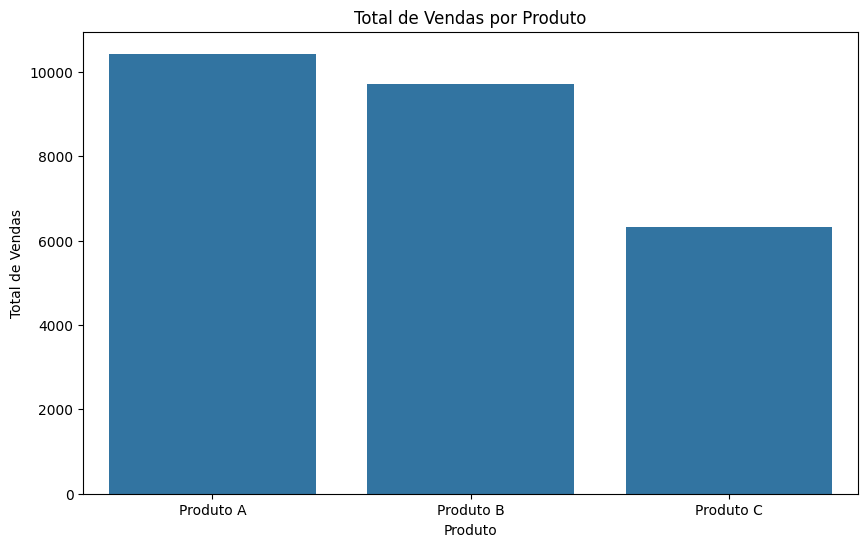

In [18]:
# Gráfico do Total de Vendas por Produto
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_produto.index, y=vendas_por_produto.values)
plt.title('Total de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')

### **Comentário:** é possível observar que o **Produto A** foi o mais vendido no ano de 2023.

## Análise Exploratória de Dados de Vendas

### Tedência de Vendas ao Longo do Tempo (Meses)

In [19]:
# Transformar a coluna 'Data' em datetime novamente pois o arquivo CSV não salva assim.
data_clean['Data'] = pd.to_datetime(data_clean['Data'])

In [20]:
# Agrupando por mês
vendas_por_mes = data_clean.groupby(data_clean['Data'].dt.to_period('M'))['Total_Vendas'].sum()
vendas_por_mes

,Total_Vendas
Data,
2023-01,1354.68
2023-02,3425.13
2023-03,1205.95
2023-04,2124.61
2023-05,2847.78
2023-06,1513.59
2023-07,2891.99
2023-08,1085.36
2023-09,2554.51


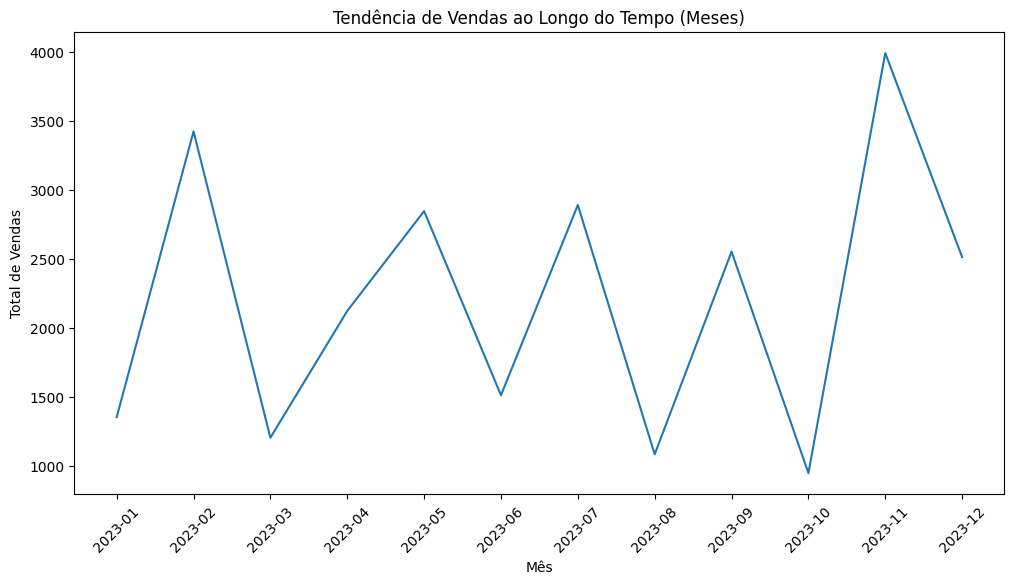

In [ ]:
# Gráfico de linha da tedência de vendas ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x=vendas_por_mes.index.astype(str), y=vendas_por_mes)
plt.title('Tendência de Vendas ao Longo do Tempo (Meses)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

**Comentário**: buscando uma análise mais aprofundada, decidi verificar a tendência de vendas por produto.

In [21]:
# Tendência de vendas mês x produtos
vendas_por_produto_mes = data_clean.groupby([data_clean['Data'].dt.to_period('M'), 'Produto'])['Total_Vendas'].sum().unstack()
vendas_por_produto_mes

Produto,Produto A,Produto B,Produto C
Data,,,
2023-01,596.70,757.98,NaN
2023-02,1672.80,NaN,1752.33
2023-03,232.05,776.88,197.02
2023-04,352.10,1599.43,173.08
2023-05,1482.91,951.60,413.27
2023-06,610.15,903.44,NaN
2023-07,1912.10,275.13,704.76
2023-08,575.96,509.40,NaN
2023-09,1288.62,1265.89,NaN


In [22]:
vendas_por_produto_mes.isna().sum()

,0
Produto,
Produto A,0
Produto B,1
Produto C,5


**Inferencia:** por ser preenchido com NaN, provavelmente esses produtos não foram vendidos nesses meses. Logo, optei por tratar os valores faltantes por *zero*

In [23]:
vendas_por_produto_mes = vendas_por_produto_mes.fillna(0)
vendas_por_produto_mes

Produto,Produto A,Produto B,Produto C
Data,,,
2023-01,596.70,757.98,0.00
2023-02,1672.80,0.00,1752.33
2023-03,232.05,776.88,197.02
2023-04,352.10,1599.43,173.08
2023-05,1482.91,951.60,413.27
2023-06,610.15,903.44,0.00
2023-07,1912.10,275.13,704.76
2023-08,575.96,509.40,0.00
2023-09,1288.62,1265.89,0.00


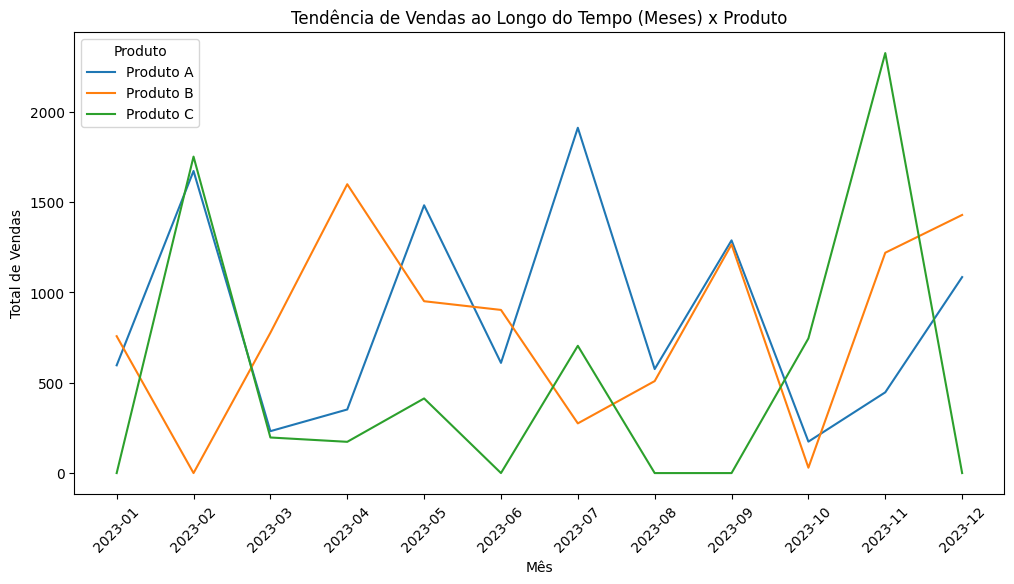

In [25]:
# Grafico de Linha do total de vendas por mês
plt.figure(figsize=(12, 6))
# Transformar as colunas (Produto) em linhas e criando novas colunas 'Produto' e 'Total_Vendas'
vendas_por_produto_mes_melted = vendas_por_produto_mes.melt(ignore_index=False, var_name='Produto', value_name='Total_Vendas')
vendas_por_produto_mes_melted = vendas_por_produto_mes_melted.reset_index()
vendas_por_produto_mes_melted['Data'] = vendas_por_produto_mes_melted['Data'].astype(str)

sns.lineplot(data=vendas_por_produto_mes_melted, x='Data', y='Total_Vendas', hue='Produto')
plt.title('Tendência de Vendas ao Longo do Tempo (Meses) x Produto')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

### **Inferências:**

1. Ao analisar o gráfico 'Tendência de Vendas ao Longo do Tempo (Meses)', é possível observar alta volatilidade, podendo indicar uma instabilidade considerável.
2. O maior pico de vendas ocorreu no mês de Novembro e uma baixa nas vendas no mês de outubro.
3. Observando a tendência de vendas por produto, nota-se que tanto os Produtos B e C oscilam bastante durante o ano.
4. Verificando tabela e gráfico, o Produto C não foi vendido em alguns meses do ano (Janeiro, Junho, Agosto, Setembro e Dezembro).

### **Insight 1:**

* A flutuação das vendas pode estar relacionado à sazonalidade dos produtos. Sendo Novembro o mês com maiores vendas, pode estar relacionados à promoções aplicadas durante a Black Friday.

### **Insight 2:**

* Apesar do pico de vendas do Produto C, faz-se necessário realizar um estudo mais profundo sobre relevância desse produto no mercado e retorno financeiro do mesmo. A partir dessas informações, fazer mudanças nas estratégias de marketing ou fazer a retirada do produto.

### **Insight 3:**

* O Produto A apresenta uma tendência de crescimento gradual ao longo do ano, com algumas oscilações. Logo, seria necessário identificar quais campanhas mensais tiveram mais impacto; explorar plataformas digitais para alcançar mais público; e também realizar teste A/B comparando diferentes mensagens sobre o produto para o público.
